In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load the data

test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')

# have a look at features for training data

train_feature_ = list(train_data.columns)
print(train_feature_)

feature = list(train_data.columns[1:-1])
label = train_data.columns[-1]
print(feature)
print(label)

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

In [ ]:
# convert the dataset into numpy array

train = np.array(train_data)
test = np.array(test_data)

# divide the training set into features and label ("SalePrice")

X_train = train[:, 1:-1]
y_train = train[:, -1]

X_test = test[:, 1:]
feature_set = np.vstack((X_train, X_test))

print(train[0]) # have a look at the first training sample
print(test[0]) # have a look at the first testing sample.

[1 60 'RL' 65.0 8450 'Pave' nan 'Reg' 'Lvl' 'AllPub' 'Inside' 'Gtl'
 'CollgCr' 'Norm' 'Norm' '1Fam' '2Story' 7 5 2003 2003 'Gable' 'CompShg'
 'VinylSd' 'VinylSd' 'BrkFace' 196.0 'Gd' 'TA' 'PConc' 'Gd' 'TA' 'No'
 'GLQ' 706 'Unf' 0 150 856 'GasA' 'Ex' 'Y' 'SBrkr' 856 854 0 1710 1 0 2 1
 3 1 'Gd' 8 'Typ' 0 nan 'Attchd' 2003.0 'RFn' 2 548 'TA' 'TA' 'Y' 0 61 0 0
 0 0 nan nan nan 0 2 2008 'WD' 'Normal' 208500]
[1461 20 'RH' 80.0 11622 'Pave' nan 'Reg' 'Lvl' 'AllPub' 'Inside' 'Gtl'
 'NAmes' 'Feedr' 'Norm' '1Fam' '1Story' 5 6 1961 1961 'Gable' 'CompShg'
 'VinylSd' 'VinylSd' 'None' 0.0 'TA' 'TA' 'CBlock' 'TA' 'TA' 'No' 'Rec'
 468.0 'LwQ' 144.0 270.0 882.0 'GasA' 'TA' 'Y' 'SBrkr' 896 0 0 896 0.0 0.0
 1 0 2 1 'TA' 5 'Typ' 0 nan 'Attchd' 1961.0 'Unf' 1.0 730.0 'TA' 'TA' 'Y'
 140 0 0 0 120 0 nan 'MnPrv' nan 0 6 2010 'WD' 'Normal']


In [ ]:
# sizes of datasets

print(train.shape, test.shape, y_train.shape)

(1460, 81) (1459, 80) (1460,)


In [ ]:
# cate_index: index for categotical features
# num_index: index for numerical features.

cate_index = []
num_index = []

In [ ]:
# print a set of features to determine whether it is a categorical feature or a numerical feature.

print(X_train[0:10, 0:10])

[[60 'RL' 65.0 8450 'Pave' nan 'Reg' 'Lvl' 'AllPub' 'Inside']
 [20 'RL' 80.0 9600 'Pave' nan 'Reg' 'Lvl' 'AllPub' 'FR2']
 [60 'RL' 68.0 11250 'Pave' nan 'IR1' 'Lvl' 'AllPub' 'Inside']
 [70 'RL' 60.0 9550 'Pave' nan 'IR1' 'Lvl' 'AllPub' 'Corner']
 [60 'RL' 84.0 14260 'Pave' nan 'IR1' 'Lvl' 'AllPub' 'FR2']
 [50 'RL' 85.0 14115 'Pave' nan 'IR1' 'Lvl' 'AllPub' 'Inside']
 [20 'RL' 75.0 10084 'Pave' nan 'Reg' 'Lvl' 'AllPub' 'Inside']
 [60 'RL' nan 10382 'Pave' nan 'IR1' 'Lvl' 'AllPub' 'Corner']
 [50 'RM' 51.0 6120 'Pave' nan 'Reg' 'Lvl' 'AllPub' 'Inside']
 [190 'RL' 50.0 7420 'Pave' nan 'Reg' 'Lvl' 'AllPub' 'Corner']]


In [ ]:
# add corresponding index into the list

cate_index += [1,4,5,6,7,8,9]
num_index += [0,2,3]

In [ ]:
# print a set of features to determine whether it is a categorical feature or a numerical feature.

print(X_train[0:10, 10:20])

[['Gtl' 'CollgCr' 'Norm' 'Norm' '1Fam' '2Story' 7 5 2003 2003]
 ['Gtl' 'Veenker' 'Feedr' 'Norm' '1Fam' '1Story' 6 8 1976 1976]
 ['Gtl' 'CollgCr' 'Norm' 'Norm' '1Fam' '2Story' 7 5 2001 2002]
 ['Gtl' 'Crawfor' 'Norm' 'Norm' '1Fam' '2Story' 7 5 1915 1970]
 ['Gtl' 'NoRidge' 'Norm' 'Norm' '1Fam' '2Story' 8 5 2000 2000]
 ['Gtl' 'Mitchel' 'Norm' 'Norm' '1Fam' '1.5Fin' 5 5 1993 1995]
 ['Gtl' 'Somerst' 'Norm' 'Norm' '1Fam' '1Story' 8 5 2004 2005]
 ['Gtl' 'NWAmes' 'PosN' 'Norm' '1Fam' '2Story' 7 6 1973 1973]
 ['Gtl' 'OldTown' 'Artery' 'Norm' '1Fam' '1.5Fin' 7 5 1931 1950]
 ['Gtl' 'BrkSide' 'Artery' 'Artery' '2fmCon' '1.5Unf' 5 6 1939 1950]]


In [ ]:
# add corresponding index into the list

cate_index += [10,11,12,13,14,15]
num_index += [16,17,18,19]

In [ ]:
# print a set of features to determine whether it is a categorical feature or a numerical feature.

print(X_train[0:10, 20:30])

[['Gable' 'CompShg' 'VinylSd' 'VinylSd' 'BrkFace' 196.0 'Gd' 'TA' 'PConc'
  'Gd']
 ['Gable' 'CompShg' 'MetalSd' 'MetalSd' 'None' 0.0 'TA' 'TA' 'CBlock'
  'Gd']
 ['Gable' 'CompShg' 'VinylSd' 'VinylSd' 'BrkFace' 162.0 'Gd' 'TA' 'PConc'
  'Gd']
 ['Gable' 'CompShg' 'Wd Sdng' 'Wd Shng' 'None' 0.0 'TA' 'TA' 'BrkTil'
  'TA']
 ['Gable' 'CompShg' 'VinylSd' 'VinylSd' 'BrkFace' 350.0 'Gd' 'TA' 'PConc'
  'Gd']
 ['Gable' 'CompShg' 'VinylSd' 'VinylSd' 'None' 0.0 'TA' 'TA' 'Wood' 'Gd']
 ['Gable' 'CompShg' 'VinylSd' 'VinylSd' 'Stone' 186.0 'Gd' 'TA' 'PConc'
  'Ex']
 ['Gable' 'CompShg' 'HdBoard' 'HdBoard' 'Stone' 240.0 'TA' 'TA' 'CBlock'
  'Gd']
 ['Gable' 'CompShg' 'BrkFace' 'Wd Shng' 'None' 0.0 'TA' 'TA' 'BrkTil'
  'TA']
 ['Gable' 'CompShg' 'MetalSd' 'MetalSd' 'None' 0.0 'TA' 'TA' 'BrkTil'
  'TA']]


In [ ]:
# add corresponding index into the list

cate_index += [20,21,22,23,24,26,27,28,29]
num_index += [25]

In [ ]:
# print a set of features to determine whether it is a categorical feature or a numerical feature.

print(X_train[0:10, 30:40])

[['TA' 'No' 'GLQ' 706 'Unf' 0 150 856 'GasA' 'Ex']
 ['TA' 'Gd' 'ALQ' 978 'Unf' 0 284 1262 'GasA' 'Ex']
 ['TA' 'Mn' 'GLQ' 486 'Unf' 0 434 920 'GasA' 'Ex']
 ['Gd' 'No' 'ALQ' 216 'Unf' 0 540 756 'GasA' 'Gd']
 ['TA' 'Av' 'GLQ' 655 'Unf' 0 490 1145 'GasA' 'Ex']
 ['TA' 'No' 'GLQ' 732 'Unf' 0 64 796 'GasA' 'Ex']
 ['TA' 'Av' 'GLQ' 1369 'Unf' 0 317 1686 'GasA' 'Ex']
 ['TA' 'Mn' 'ALQ' 859 'BLQ' 32 216 1107 'GasA' 'Ex']
 ['TA' 'No' 'Unf' 0 'Unf' 0 952 952 'GasA' 'Gd']
 ['TA' 'No' 'GLQ' 851 'Unf' 0 140 991 'GasA' 'Ex']]


In [ ]:
# add corresponding index into the list

cate_index += [30,31,32,34,38,39]
num_index += [33,35,36,37]

In [ ]:
# print a set of features to determine whether it is a categorical feature or a numerical feature.

print(X_train[0:10, 40:50])

[['Y' 'SBrkr' 856 854 0 1710 1 0 2 1]
 ['Y' 'SBrkr' 1262 0 0 1262 0 1 2 0]
 ['Y' 'SBrkr' 920 866 0 1786 1 0 2 1]
 ['Y' 'SBrkr' 961 756 0 1717 1 0 1 0]
 ['Y' 'SBrkr' 1145 1053 0 2198 1 0 2 1]
 ['Y' 'SBrkr' 796 566 0 1362 1 0 1 1]
 ['Y' 'SBrkr' 1694 0 0 1694 1 0 2 0]
 ['Y' 'SBrkr' 1107 983 0 2090 1 0 2 1]
 ['Y' 'FuseF' 1022 752 0 1774 0 0 2 0]
 ['Y' 'SBrkr' 1077 0 0 1077 1 0 1 0]]


In [ ]:
# add corresponding index into the list

cate_index += [40,41]
num_index += [42,43,44,45,46,47,48,49]

In [ ]:
# print a set of features to determine whether it is a categorical feature or a numerical feature.

print(X_train[0:10, 50:60])

[[3 1 'Gd' 8 'Typ' 0 nan 'Attchd' 2003.0 'RFn']
 [3 1 'TA' 6 'Typ' 1 'TA' 'Attchd' 1976.0 'RFn']
 [3 1 'Gd' 6 'Typ' 1 'TA' 'Attchd' 2001.0 'RFn']
 [3 1 'Gd' 7 'Typ' 1 'Gd' 'Detchd' 1998.0 'Unf']
 [4 1 'Gd' 9 'Typ' 1 'TA' 'Attchd' 2000.0 'RFn']
 [1 1 'TA' 5 'Typ' 0 nan 'Attchd' 1993.0 'Unf']
 [3 1 'Gd' 7 'Typ' 1 'Gd' 'Attchd' 2004.0 'RFn']
 [3 1 'TA' 7 'Typ' 2 'TA' 'Attchd' 1973.0 'RFn']
 [2 2 'TA' 8 'Min1' 2 'TA' 'Detchd' 1931.0 'Unf']
 [2 2 'TA' 5 'Typ' 2 'TA' 'Attchd' 1939.0 'RFn']]


In [ ]:
# add corresponding index into the list

cate_index += [52,54,56,57,59]
num_index += [50,51,53,55,58]

In [ ]:
# print a set of features to determine whether it is a categorical feature or a numerical feature.

print(X_train[0:10, 60:70])

[[2 548 'TA' 'TA' 'Y' 0 61 0 0 0]
 [2 460 'TA' 'TA' 'Y' 298 0 0 0 0]
 [2 608 'TA' 'TA' 'Y' 0 42 0 0 0]
 [3 642 'TA' 'TA' 'Y' 0 35 272 0 0]
 [3 836 'TA' 'TA' 'Y' 192 84 0 0 0]
 [2 480 'TA' 'TA' 'Y' 40 30 0 320 0]
 [2 636 'TA' 'TA' 'Y' 255 57 0 0 0]
 [2 484 'TA' 'TA' 'Y' 235 204 228 0 0]
 [2 468 'Fa' 'TA' 'Y' 90 0 205 0 0]
 [1 205 'Gd' 'TA' 'Y' 0 4 0 0 0]]


In [ ]:
# add corresponding index into the list

cate_index += [62,63,64]
num_index += [60,61,65,66,67,68,69]

In [ ]:
# print a set of features to determine whether it is a categorical feature or a numerical feature.

print(X_train[0:10, 70:])

[[0 nan nan nan 0 2 2008 'WD' 'Normal']
 [0 nan nan nan 0 5 2007 'WD' 'Normal']
 [0 nan nan nan 0 9 2008 'WD' 'Normal']
 [0 nan nan nan 0 2 2006 'WD' 'Abnorml']
 [0 nan nan nan 0 12 2008 'WD' 'Normal']
 [0 nan 'MnPrv' 'Shed' 700 10 2009 'WD' 'Normal']
 [0 nan nan nan 0 8 2007 'WD' 'Normal']
 [0 nan nan 'Shed' 350 11 2009 'WD' 'Normal']
 [0 nan nan nan 0 4 2008 'WD' 'Abnorml']
 [0 nan nan nan 0 1 2008 'WD' 'Normal']]


In [ ]:
# add corresponding index into the list

cate_index += [71,72,73,77,78]
num_index += [70,74,75,76]

In [ ]:
# Have a look at the index

print(cate_index)
print(num_index)

print(len(cate_index), len(num_index))

[1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 34, 38, 39, 40, 41, 52, 54, 56, 57, 59, 62, 63, 64, 71, 72, 73, 77, 78]
[0, 2, 3, 16, 17, 18, 19, 25, 33, 35, 36, 37, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 55, 58, 60, 61, 65, 66, 67, 68, 69, 70, 74, 75, 76]
43 36


In [ ]:
print(X_train.shape, X_test.shape)

(1460, 79) (1459, 79)


# Preprocessing.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# preprocess the categorical features using one-hot-encoder

for i in range(len(cate_index)):
    i_data = np.hstack((X_train[:, cate_index[i]], X_test[:, cate_index[i]]))
    i_data = np.array(i_data)
    
    # missing values are fixed using SimpleImputer
    
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    imp_mean.fit(i_data.reshape((-1,1)))
    i_data = imp_mean.transform(i_data.reshape((-1,1)))
    i_train = imp_mean.transform(X_train[:, cate_index[i]].reshape((-1,1)))
    i_test = imp_mean.transform(X_test[:, cate_index[i]].reshape((-1,1)))
    
    # One hot encoder to transform the categorical features.
    
    enc = OneHotEncoder(handle_unknown='ignore')
    enc.fit(i_data.reshape((-1,1)))
    i_data = enc.transform(i_data.reshape((-1,1))).toarray()
    i_train = enc.transform(i_train.reshape((-1,1))).toarray()
    i_test = enc.transform(i_test.reshape((-1,1))).toarray()
    
    # Create the encoded dataset
    
    if i == 0:
        train_enc = np.array(i_train)
        test_enc = np.array(i_test)
    else:
        train_enc = np.hstack((train_enc, i_train))
        test_enc = np.hstack((test_enc, i_test))


In [ ]:
print(train_enc.shape, test_enc.shape)

(1460, 252) (1459, 252)


In [ ]:
# preprocess the numerical features using one-hot-encoder

for i in range(len(num_index)):
    i_data = np.hstack((X_train[:, num_index[i]], X_test[:, num_index[i]]))
    i_data = np.array(i_data)
    
    # missing values are fixed using SimpleImputer

    imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp_mean.fit(i_data.reshape((-1,1)))
    i_data = imp_mean.transform(i_data.reshape((-1,1)))
    i_train = imp_mean.transform(X_train[:, num_index[i]].reshape((-1,1)))
    i_test = imp_mean.transform(X_test[:, num_index[i]].reshape((-1,1)))
    
    # add the numerical features into the dataset
    
    train_enc = np.hstack((train_enc, i_train))
    test_enc = np.hstack((test_enc, i_test))

In [ ]:
print(train_enc.shape, test_enc.shape)

(1460, 288) (1459, 288)


So we have 288 features in total (after one hot encoding transformation).

In [ ]:
# check the shape of y_train dataset
print(y_train.shape)

(1460,)


In [ ]:
# use SimpleImputer to fix missing value in the label y_train ("SalePrice")

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(y_train.reshape((-1,1)))
y_train = imp_mean.transform(y_train.reshape((-1,1)))

In [ ]:
# Check that there is no missing value in the label dataset.

np.sum(np.isnan(y_train))

0

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the features into the value range (0,1)

scaler = MinMaxScaler()
scaler.fit(np.vstack((train_enc, test_enc)))
train_enc = scaler.transform(train_enc)
test_enc = scaler.transform(test_enc)

### train_enc: features of training set
### test: features of testing set
### y_train: "SalePrice" of training set

# Split the training set.


In [ ]:
print(train_enc.shape, test_enc.shape, y_train.shape)

(1460, 288) (1459, 288) (1460, 1)


In [ ]:
# split the original training dataset into training set and testing set

from sklearn.model_selection import train_test_split

data = np.hstack((train_enc, y_train))
train, test = train_test_split(data, test_size = 0.3)
x_train = train[:, :-1]
y_train = train[:, -1]
x_test = test[:, :-1]
y_test = test[:, -1]
x_final_test = test_enc

print(x_train.shape, y_train.shape, x_test.shape)

(1022, 288) (1022,) (438, 288)


# Linear regression.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from math import sqrt

# Implement the linear regression model

reg = LinearRegression().fit(x_train, y_train)

# Make prediction using the linear regression model.

pred = reg.predict(x_test)

# Have a look at the first 100 prediction values and corresponding ground truth values.

print(pred[:100])
print(y_test[:100])

error = sqrt(mean_squared_error(y_test[:100],pred[:100]))
error

[ 3.80928000e+05  3.97568000e+05  1.46816000e+05  1.92640000e+05
  2.66083187e+16  1.85344000e+05  1.76512000e+05  1.37728000e+05
  3.47264000e+05  1.01504000e+05  6.23360000e+04  1.25696000e+05
  1.67040000e+05  2.20544000e+05  2.75328000e+05  2.24640000e+05
  1.24032000e+05  1.82016000e+05  1.62048000e+05  1.94176000e+05
  2.58432000e+05  2.00576000e+05  1.44000000e+05  1.40416000e+05
  1.99808000e+05  1.14304000e+05  2.68928000e+05  1.05472000e+05
  1.08160000e+05  1.77536000e+05  1.75360000e+05  9.28000000e+04
  1.82784000e+05  1.06368000e+05  1.51680000e+05  1.29536000e+05
  1.79328000e+05  1.12128000e+05  1.12768000e+05  1.97248000e+05
  2.78400000e+05  1.81120000e+05  1.18272000e+05  1.35168000e+05
  2.11840000e+05  1.38624000e+05  1.05344000e+05  1.81120000e+05
  8.17920000e+04  5.72160000e+04  2.28224000e+05  2.06464000e+05
  2.18240000e+05  4.15872000e+05  1.50272000e+05  6.42560000e+04
  1.56544000e+05  1.51680000e+05  1.87776000e+05  2.43328000e+05
  5.69600000e+04  2.15680

3112109382626764.0

#### Note that there are few prediction value in the first 100 test points that is very large: ~e+16, so we restrict the value range of the prediction within the range of the training set's saleprice value range.

In [ ]:
# restrict the value range of prediction.

min_train = y_train.min()
max_train = y_train.max()
print(min_train, max_train)

for i in range(len(pred)):
    if pred[i] <= min_train:
        pred[i] = min_train
    elif pred[i] >= max_train:
        pred[i] = max_train

35311.0 755000.0


In [ ]:
error = sqrt(mean_squared_error(y_test,pred))
error
print('RMSE value for this linear regression model is: ', error)

RMSE value for this linear regression model is:  65256.00009406228


# KNN model.

In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
rmse_val = []
#append RMSE value at K values from 1 to 20
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  
    pred=model.predict(x_test) 
    error = sqrt(mean_squared_error(y_test,pred)) 
    rmse_val.append(error) 
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 54218.945411175235
RMSE value for k=  2 is: 49326.95465167431
RMSE value for k=  3 is: 45998.30498524347
RMSE value for k=  4 is: 45154.46231848256
RMSE value for k=  5 is: 45523.52951141143
RMSE value for k=  6 is: 45366.684431024994
RMSE value for k=  7 is: 44850.31156870481
RMSE value for k=  8 is: 44205.04457286398
RMSE value for k=  9 is: 44079.595004494695
RMSE value for k=  10 is: 44231.23437271857
RMSE value for k=  11 is: 44318.23116632754
RMSE value for k=  12 is: 44811.4257120627
RMSE value for k=  13 is: 45111.55807062188
RMSE value for k=  14 is: 45402.02121280975
RMSE value for k=  15 is: 45567.925856509675
RMSE value for k=  16 is: 45562.75812771226
RMSE value for k=  17 is: 45521.08353039962
RMSE value for k=  18 is: 45663.548783568614
RMSE value for k=  19 is: 45488.49244445747
RMSE value for k=  20 is: 45551.96578864758


<AxesSubplot:>

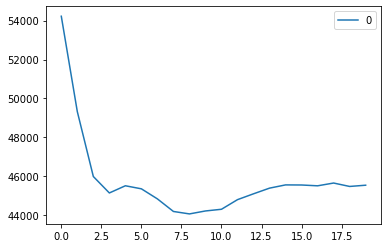

In [ ]:
#elbow plot of RMSE and K value
curve = pd.DataFrame(rmse_val) 
curve.plot()

# Neural network.

In [ ]:
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torch.optim as optim
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import torch.utils.data as data_utils

batch_size=128 # determine the batch size.

# create the dataloader for the neural network.

y_train = torch.tensor(y_train)
x_train = torch.tensor(x_train) 
train_tensor = data_utils.TensorDataset(x_train, y_train) 
train_loader = data_utils.DataLoader(dataset = train_tensor, batch_size = batch_size, shuffle = True)

y_test = torch.tensor(y_test)
x_test = torch.tensor(x_test) 
test_tensor = data_utils.TensorDataset(x_test, y_test) 
test_loader = data_utils.DataLoader(dataset = train_tensor, batch_size = batch_size, shuffle = True)

In [ ]:
# in this model I use relu activation function and 3-layer structure.

class Net_relu(nn.Module): 
    def __init__(self):
        super(Net_relu, self).__init__()
        self.fc1 = nn.Linear(288, 1024)
        self.fc2 = nn.Linear(1024, 256)
        self.fc3 = nn.Linear(256, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        output = x
        return output

In [ ]:
def train(model, train_loader, optimizer, epoch, train_loss, train_accu):
    model.train() 
    train_l = 0 # training loss.
    
    # optimize the neural network with batches of data points.
    
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data.float()).float()
        loss = F.mse_loss(output, target.float()).float() # mse loss
        train_l += loss.item()
        loss.backward() # backpropogate the loss
        optimizer.step()
            
    train_loss.append(train_l/len(train_loader.dataset))

In [ ]:
# test the neural network using testing dataset

def test(model, test_loader, test_loss, test_accu):
    model.eval()
    test_l = 0
    correct = 0
    with torch.no_grad(): 
        for data, target in test_loader:
            output = model(data.float()).float()
            test_l += F.mse_loss(output, target.float()).float()

    test_loss.append(test_l/len(test_loader.dataset))

In [ ]:
model = Net_relu()
optimizer = optim.Adadelta(model.parameters(), lr=50.5)
train_loss = []
test_loss = []
train_accu = []
test_accu = []

# train the neural network with 100 epoches.

for epoch in range(1, 100 + 1):
    if epoch%10==0:
        print('Epoch: ', epoch)
    train(model, train_loader, optimizer, epoch, train_loss, train_accu)
    test(model, test_loader, test_loss, test_accu)

Epoch:  10
Epoch:  20
Epoch:  30
Epoch:  40
Epoch:  50
Epoch:  60
Epoch:  70
Epoch:  80
Epoch:  90
Epoch:  100


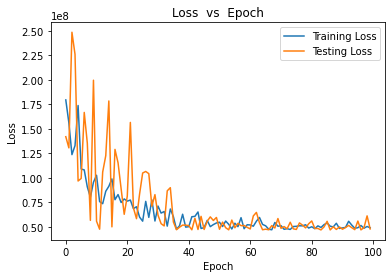

In [ ]:
# plot the training loss and testing loss over time.

xx = range(100)
plt.plot(xx, train_loss, label='Training Loss')
plt.plot(xx, test_loss, label='Testing Loss')
plt.title('Loss  vs  Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Use the last 20 test_loss values to calculate the RMSE value

np_test_loss = np.sqrt(np.array(test_loss))
error = np_test_loss[-20:].mean()
print('RMSE value for neural network model is: ', error)

RMSE value for neural network model is:  7076.742
